# **Airbnb Project: Exploratory Data Analysis of Properties in Denmark**
**Author: Anh Vi Pham - Henry Pham**  

**Scope:** The project's objective is to explore and analyze Airbnb data related to properties in Denmark. Furthermore, it aims to investigate the various aspects that differentiate properties in Sealand from the rest of Denmark. Finally, the project involves building a machine learning model to predict house prices.

**Data Source:** The data pertains to properties listed on Airbnb in Denmark during the period 2016-2019, provided by Deakin University for educational purposes.  

**General Process:** 
- Phase 1. Data Cleaning and Exploring
    + Handling missing values, duplicated values
    + Specify properties in Sealand
    + Data distribution
    + Data correlation   
- Phase 2. Data Analysis: Properties in Sealand compared to the rest of Denmark  
    + Price comparision: overall price, average price over time, price estimation with Linear Regression Analysis
    + Customer Satisfaction comparison with Hypothesis Testing
    + Property Count and Average Satisfaction Score for Landlords in Sealand
- Phase 3. Prediction Model: Properties price classification
    + Labeling
    + Handling outliers with IQR
    + Examining Data Balance and Multicollinearity with VIF 
    + Normalization
    + Modelling: Logistic Regresison, KNN, Decision Tree
    + Model Optimization with GridSearch
    + Model evaluation    
    


**Executive Summary:**  

Based on the analysis, several observations have been made: 
-	The nightly Airbnb rates in Sealand are slightly higher than the rest of Denmark, but the prices vary significantly. On the other hand, there are many outliers in the prices of Airbnb properties outside Sealand.
-	Over the three-year period from November 2016, the average prices in both areas show an increasing trend. Particularly in Sealand, there is a recurring price cycle, with a price dip usually occurring in January each year before gradually rising again.
-	The location of the property is the most influential factor in price fluctuations, alongside other factors such as room type and the number of occupants allowed in a rental.
-	There is sufficient evidence, at a 95% confidence level, to conclude that the average satisfaction of properties in Sealand is higher than the rest of Denmark.
-	5 is the recommended number of properties that a landlord should own to ensure the quality of their Airbnb services.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/anhvi02/EDA_AirBnb/main/AirBNB-Denmark-A1-2023.csv', encoding='latin-1')
df.head(5)

,prop_room_id,host_id,prop_room_type,neighborhood,reviews,overall_satisfaction,accommodates,price_USD,minstay,description,latitude,longitude,first_listed
0,7193709,37672850,Private room,Tårnby,354,5.0,1.0,41.0,1,Charming house near the airport,55.616651,12.631454,30/11/2016
1,4446663,22317683,Private room,København,285,4.5,2.0,70.0,1,værelse til leje,55.670082,12.556838,25/12/2016
2,1453654,7080722,Private room,Tårnby,319,5.0,2.0,64.0,1,"Comfortable room, close to airport",55.633597,12.618074,3/01/2017
3,30557,131674,Private room,København,345,5.0,2.0,90.0,1,Great Place in Center of Copenhagen,55.681167,12.565207,4/01/2017
4,443684,2204282,Entire home/apt,København,265,4.5,10.0,242.0,1,"Penthouse, 4-5 rooms + 5 balconies",55.703808,12.548259,9/01/2017


# **Phase 1. Data Cleaning and Exploring**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23941 entries, 0 to 23940
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prop_room_id          23941 non-null  int64  
 1   host_id               23941 non-null  int64  
 2   prop_room_type        23941 non-null  object 
 3   neighborhood          23941 non-null  object 
 4   reviews               23941 non-null  int64  
 5   overall_satisfaction  23941 non-null  float64
 6   accommodates          23939 non-null  float64
 7   price_USD             23939 non-null  float64
 8   minstay               23941 non-null  int64  
 9   description           23855 non-null  object 
 10  latitude              23941 non-null  float64
 11  longitude             23940 non-null  float64
 12  first_listed          23941 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 2.4+ MB


In [33]:
df.isnull().sum()

prop_room_id             0
host_id                  0
prop_room_type           0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             2
price_USD                2
minstay                  0
description             86
latitude                 0
longitude                1
first_listed             0
dtype: int64

In [34]:
df = df.dropna(subset=['accommodates', 'price_USD','longitude'])
df.isnull().sum()

prop_room_id             0
host_id                  0
prop_room_type           0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
price_USD                0
minstay                  0
description             85
latitude                 0
longitude                0
first_listed             0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.describe()

,prop_room_id,host_id,reviews,overall_satisfaction,accommodates,price_USD,minstay,latitude,longitude
count,2.393600e+04,2.393600e+04,23936.000000,23936.000000,23936.000000,23936.000000,23936.000000,23936.000000,23936.000000
mean,1.105201e+07,4.197182e+07,9.510988,2.505139,4.043658,110.744485,1.006852,55.831366,11.565701
std,5.487977e+06,3.532349e+07,19.272641,2.378072,2.268092,114.262813,0.195935,0.484171,1.377947
min,2.493600e+04,3.471000e+04,0.000000,0.000000,1.000000,1.000000,1.000000,54.572779,8.087828
25%,6.562074e+06,1.272914e+07,0.000000,0.000000,2.000000,61.000000,1.000000,55.660702,10.209131
50%,1.239131e+07,3.279631e+07,3.000000,4.000000,4.000000,89.000000,1.000000,55.693640,12.460746
75%,1.579362e+07,6.480749e+07,10.000000,5.000000,6.000000,132.000000,1.000000,56.075316,12.557020
max,1.886479e+07,1.314207e+08,386.000000,5.000000,16.000000,7909.000000,20.000000,57.735625,15.153187


In [ ]:
# calculate price per person
df['price_per_night'] = df['price_USD']/df['minstay']

In [37]:
# locate Sealand with latitude and longitude
df['location'] = 'Non-Sealand'
df.loc[(df['latitude']<=55.78) & (df['longitude']>=10.994) & (df['longitude']<=12.672), 'location'] = 'Sealand' 
df['location'].value_counts()

Sealand        12630
Non-Sealand    11306
Name: location, dtype: int64

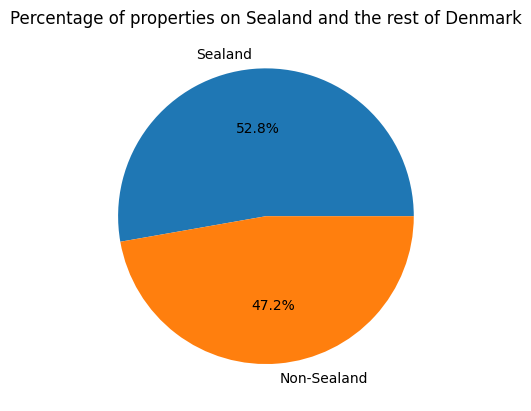

In [38]:
df['location'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of properties on Sealand and the rest of Denmark')
plt.ylabel('') 
plt.show()

Among 23936 properties included in the dataset, 52.8% of them are located in Sealand, which is 12630 properties.  

Data distribution

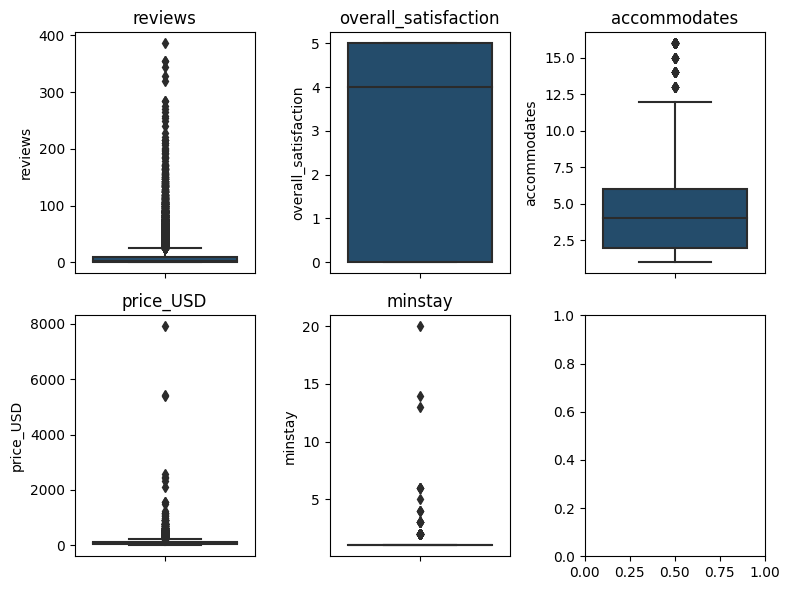

In [39]:
columns = ['reviews','overall_satisfaction', 'accommodates', 'price_USD', 'minstay']
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
axs = axs.ravel()
for ind, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[ind], color='#184e77')
    axs[ind].set_title(col)
plt.tight_layout()
plt.show()

From the plots, we can draw two main observations:

- Most of the variables exhibit a strong right-skewness.
- Numerous outliers are noticeable, particularly in the case of the number of occupants allowed in a rental and the price.

*AirBnB is planning an advertising campaign to promote “budget” accommodation on Sealand, i.e.properties where the price per night stay is less than $US90. Develop different classification models using appropriate input (i.e., predictor) attributes that can be used to best classify whether a Sealand rental property is budget or not*

Labeling

In [44]:
df['budget'] = 0
df.loc[df['price_per_night']<90, 'budget'] = 1

In [45]:
df = df.drop(columns={'prop_room_id', 
                        'host_id',
                        'description',
                        'first_listed',
                        'location',
                        'price_USD',
                        'minstay',
                        'price_per_night'})
df.head(2)

,prop_room_type,neighborhood,reviews,overall_satisfaction,accommodates,latitude,longitude,budget
0,Private room,Tårnby,354,5.0,1.0,55.616651,12.631454,1
1,Private room,København,285,4.5,2.0,55.670082,12.556838,1


Transforming Categorical attributes: prop_room_type, neighborhood

In [46]:
from sklearn.preprocessing import LabelEncoder
import json

cols = ['prop_room_type', 'neighborhood']

encoding_mapping = {}

for col in cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoding_mapping[col] = {str(label): int(encoded_value) for label, encoded_value in zip(enc.classes_, enc.transform(enc.classes_))}

# Save encoding mapping to a JSON file
with open('encoding_mapping.json', 'w') as json_file:
    json.dump(encoding_mapping, json_file, indent=2)  # indent for pretty formatting

# Print the encoding mapping
for col, mapping in encoding_mapping.items():
    print(f"{col} encoding:")
    for label, encoded_value in mapping.items():
        print(f'"{label}": {encoded_value}')
    print()
import json
with open('encoding_mapping.json', 'w') as json_file:
    json.dump(encoding_mapping, json_file)

prop_room_type encoding:
"Entire home/apt": 0
"Private room": 1
"Shared room": 2

neighborhood encoding:
"Aabenraa": 0
"Aalborg": 1
"Aarhus": 2
"Albertslund": 3
"Allerød": 4
"Assens": 5
"Ballerup": 6
"Billund": 7
"Bornholm": 8
"Brøndby": 9
"Brønderslev": 10
"Dragør": 11
"Egedal": 12
"Esbjerg": 13
"Faaborg-Midtfyn": 14
"Fanø": 15
"Favrskov": 16
"Faxe": 17
"Fredensborg": 18
"Fredericia": 19
"Frederiksberg": 20
"Frederikshavn": 21
"Frederikssund": 22
"Furesø": 23
"Gentofte": 24
"Gladsaxe": 25
"Glostrup": 26
"Greve": 27
"Gribskov": 28
"Guldborgsund": 29
"Haderslev": 30
"Halsnæs": 31
"Hedensted": 32
"Helsingør": 33
"Herlev": 34
"Herning": 35
"Hillerød": 36
"Hjørring": 37
"Holbæk": 38
"Holstebro": 39
"Horsens": 40
"Hvidovre": 41
"Høje Taastrup": 42
"Hørsholm": 43
"Ikast-Brande": 44
"Ishøj": 45
"Jammerbugt": 46
"Kalundborg": 47
"Kerteminde": 48
"Kolding": 49
"København": 50
"Køge": 51
"Langeland": 52
"Lejre": 53
"Lemvig": 54
"Lolland": 55
"Lyngby-Taarbæk": 56
"Læsø": 57
"Mariagerfjord": 58
"M

Data Distribution

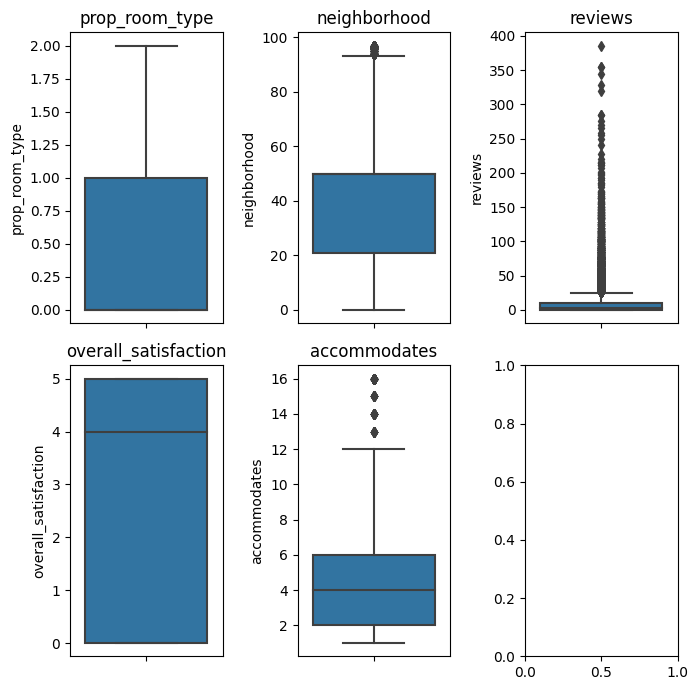

In [47]:
columns = ['prop_room_type','neighborhood','reviews','overall_satisfaction', 'accommodates']
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
axs = axs.ravel()
for ind, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[ind])
    axs[ind].set_title(col)

plt.tight_layout()
plt.show()

Handling Outliers

Number of observations before outliers removal: 23936
Number of observations after outliers removal: 20757


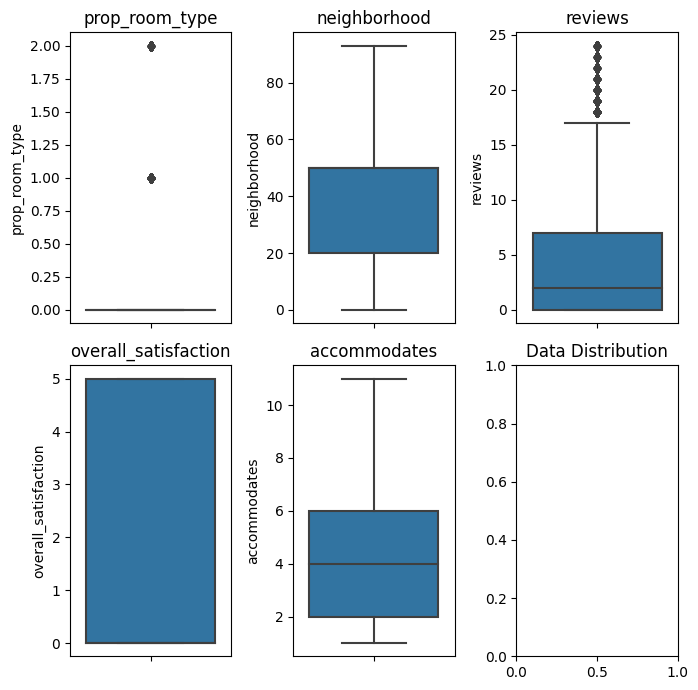

In [48]:
print('Number of observations before outliers removal:', len(df))
# Remove outliers for the 3 columns
columns = ['neighborhood', 'reviews', 'accommodates']
def iqr_outliers(series):
    Q1, Q3= np.percentile(series,[25,75])
    IQR = Q3 - Q1 
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    series_outlier_removed = series[(series > lower_fence) & (series < upper_fence)]
    return series_outlier_removed
for col in columns:
    df[col] = iqr_outliers(df[col])
df = df.dropna()
print('Number of observations after outliers removal:', len(df))
# Visualize the distribution
columns = ['prop_room_type','neighborhood','reviews','overall_satisfaction', 'accommodates']
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
axs = axs.ravel()
for ind, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[ind])
    axs[ind].set_title(col)
plt.title('Data Distribution')
plt.tight_layout()
plt.show()


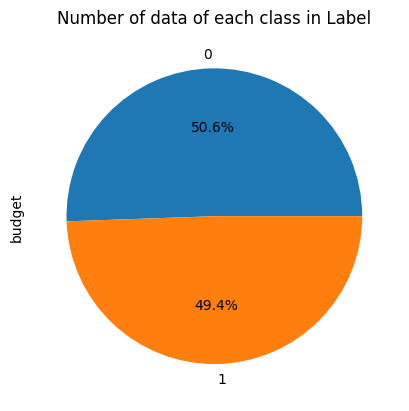

In [49]:
df['budget'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Number of data of each class in Label')
plt.show()

Correlation

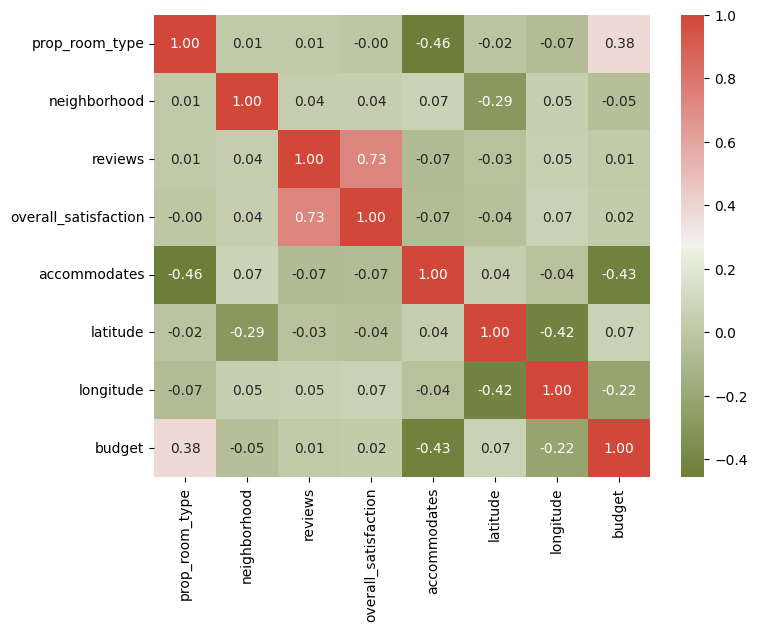

In [50]:
# pearson correlation
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 15, as_cmap=True)

# plotting
plt.figure(figsize=(8,6))
sns.heatmap(data=corr,annot=True, cmap=cmap,fmt=".2f")
plt.show()


Multicollinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
# categorical variables may or maynot be added if any
variables = df
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,19940.276986,const
1,1.338719,prop_room_type
2,1.109271,neighborhood
3,2.140307,reviews
4,2.145881,overall_satisfaction
5,1.451201,accommodates
6,1.332516,latitude
7,1.309054,longitude
8,1.378779,budget


Modelling

In [52]:
#  preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
x = df.drop(columns={'budget'}, axis =1 )
y = df['budget']

In [54]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state  = 365, stratify=df['budget'])

In [55]:
y_train.value_counts()

0    8395
1    8210
Name: budget, dtype: int64

In [56]:
y_test.value_counts()

0    2099
1    2053
Name: budget, dtype: int64

In [57]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

### TRAINING MODELS

Model Optimization with GridSearch

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# initialize basic models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
# initialize parameters for models
logistic_params = {
	'penalty': ['l1', 'l2'],
	'C': [0.001, 0.01, 0.1, 1, 10, 100],
	'solver': ['liblinear', 'saga']}
knn_params = {
	'n_neighbors': [3, 5, 7, 9],
	'weights': ['uniform', 'distance'],
	'p': [1, 2]}  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)}
decision_tree_params = {
	'criterion': ['gini', 'entropy'],
	'splitter': ['best', 'random'],
	'max_depth': [None, 10, 20, 30, 40, 50],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]}

list_params = [logistic_params, knn_params, decision_tree_params]
models = [lr, knn, dt]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']
optimized_params = {}
for model, param, name in zip(models, list_params, model_names):
	model_details = {}
	
	grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5 , scoring='accuracy')
	grid_search.fit(x_train, y_train)
	best_params = grid_search.best_params_
	best_dt_model = grid_search.best_estimator_
	optimized_params[name] = best_params
optimized_params

{'Logistic Regression': {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'},
 'KNN': {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'},
 'Decision Tree': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'}}

Model Evaluation

In [59]:
#  a function to log results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def extract_results(algorithm,y_true, y_pred, target_class = 1):
    results = {}
    results['algorithm'] = algorithm
    results['accuracy'] = accuracy_score(y_test,y_pred)
    results['recall'] = recall_score(y_true, y_pred, pos_label=target_class)
    results['precision'] = precision_score(y_true, y_pred, pos_label=target_class)
    results['f1_score'] = f1_score(y_true, y_pred, pos_label=target_class)
    results['roc_auc'] = roc_auc_score(y_true, y_pred)
    return results

In [60]:
# initialize models (optimized from GridSearch

lr = LogisticRegression(**optimized_params['Logistic Regression'])
knn = KNeighborsClassifier(**optimized_params['KNN'])
dt = DecisionTreeClassifier(**optimized_params['Decision Tree'])

# innitialize a list to save results of models
list_result = []

# train and extract results
models = [lr, knn, dt]
models_name = ['Logistic Regression', 'KNN', 'Decision Tree']

for model, name in zip(models, models_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_result = extract_results(algorithm=name, y_true=y_test, y_pred=y_pred, target_class=1)
    list_result.append(model_result)

df_result = pd.DataFrame(list_result)
df_result

,algorithm,accuracy,recall,precision,f1_score,roc_auc
0,Logistic Regression,0.730491,0.734535,0.724304,0.729383,0.730536
1,KNN,0.739403,0.717000,0.746072,0.731247,0.739157
2,Decision Tree,0.753372,0.743302,0.754325,0.748773,0.753262


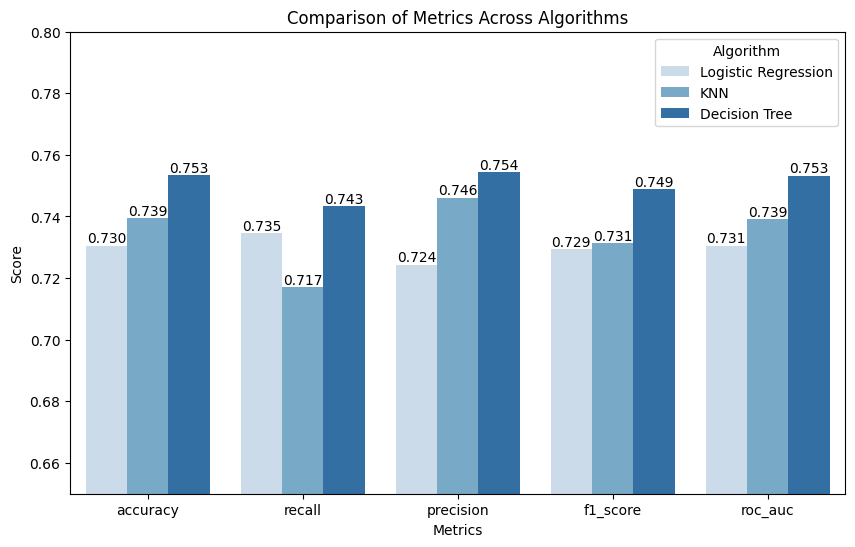

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to have a single column for metrics
df_melted = pd.melt(df_result, id_vars='algorithm', value_vars=['accuracy', 'recall', 'precision', 'f1_score', 'roc_auc'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='variable', y='value', hue='algorithm', data=df_melted, palette='Blues')
plt.title('Comparison of Metrics Across Algorithms')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.65,0.8)
plt.legend(title='Algorithm')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
plt.show()

Based on the plot, it is evident that the Decision Tree outperformed the other two models in every metric. Consequently, I have selected the Decision Tree as the final model for deployment. The chosen model has a simple configuration with the following parameters:  


- 'max_depth': 10
- 'min_samples_leaf': 2
- 'min_samples_split': 5

### FINAL MODEL FOR DEPLOYMENT: Decision Tree

Accuracy = 0.7533718689788054
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2099
           1       0.75      0.74      0.75      2053

    accuracy                           0.75      4152
   macro avg       0.75      0.75      0.75      4152
weighted avg       0.75      0.75      0.75      4152



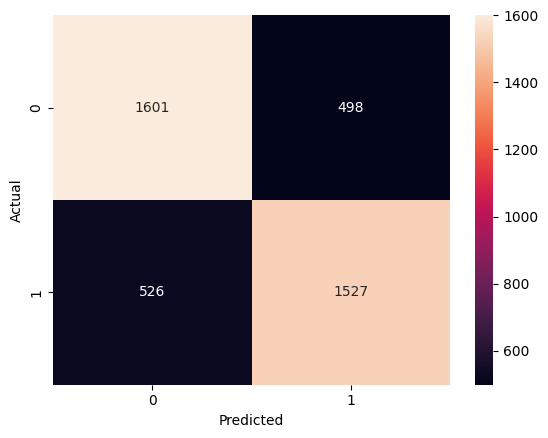

In [62]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree_params = {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'}
dd = DecisionTreeClassifier(**decision_tree_params)
dd.fit(x_train,y_train)
y_pred = dd.predict(x_test)
# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))
# cassification report
print(classification_report(y_test,y_pred))
# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()


# Save Model

In [63]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(dd, 'model.joblib')

['model.joblib']